In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Linear regression

In [4]:
train_data = pd.read_csv('../data/train_final.csv')
train_data = train_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
train_X = train_data.drop(columns=['IMDB Score'])
print(np.cov(train_data['IMDB Score']))

1.233149386602954


In [9]:
linearRegression = LinearRegression().fit(train_X, train_data['IMDB Score'])

Traint R^2:  0.5250735994460494


In [5]:
valid_data = pd.read_csv('../data/valid_final.csv')
valid_data = valid_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
valid_X = valid_data.drop(columns=['IMDB Score'])
print(np.cov(valid_data['IMDB Score']))

1.262665405232249


In [6]:
test_data = pd.read_csv('../data/test_final.csv')
test_data = test_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
test_X = test_data.drop(columns=['IMDB Score'])
print(np.cov(test_data['IMDB Score']))

1.2621754170154778


In [20]:
print('train R^2: ', linearRegression.score(train_X, train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(linearRegression.predict(train_X), train_data['IMDB Score']))

print('valid R^2: ', linearRegression.score(valid_X, valid_data['IMDB Score']))
print('valid MSE: ', mean_squared_error(linearRegression.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', linearRegression.score(test_X, test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegression.predict(test_X), test_data['IMDB Score']))

train R^2:  0.5250735994460494
train MSE:  0.5856246441325994
valid R^2:  0.3858524539381154
valid MSE:  0.7752740452045943
test R^2:  0.3464380156471152
test MSE:  0.8247090644327882


# Ridge regression

In [22]:
ridgeRegression = Ridge(alpha = 10, random_state = 0).fit(train_X, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegression.score(train_X, train_data['IMDB Score']))
print('Train MSE: ', mean_squared_error(ridgeRegression.predict(train_X), train_data['IMDB Score']))

print('Valid R^2: ', ridgeRegression.score(valid_X, valid_data['IMDB Score']))
print('Valid MSE: ', mean_squared_error(ridgeRegression.predict(valid_X), valid_data['IMDB Score']))

print('Test R^2: ', ridgeRegression.score(test_X, test_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegression.predict(test_X), test_data['IMDB Score']))

/home/shone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.80651e-19): result may not be accurate.
  overwrite_a=True).T


Train R^2:  0.46215167314368266
Train MSE:  0.6632127307413479
Valid R^2:  0.40788176067345416
Valid MSE:  0.7474651744287141
Test R^2:  0.38127772069100907
Test MSE:  0.7807459496253791


# Lasso (Least Absolute Shrinkage and Selection Operator)

In [26]:
lassoRegression = Lasso(alpha=0.01, random_state=0).fit(train_X, train_data['IMDB Score'])

In [27]:
print('train R^2: ', lassoRegression.score(train_X, train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(lassoRegression.predict(train_X), train_data['IMDB Score']))

print('valid R^2: ', lassoRegression.score(valid_X, valid_data['IMDB Score']))
print('valid MSE: ', mean_squared_error(lassoRegression.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', lassoRegression.score(test_X, test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegression.predict(test_X), test_data['IMDB Score']))

train R^2:  0.24124394121505233
train MSE:  0.935610752299949
valid R^2:  0.25224877036233595
valid MSE:  0.9439297190474919
test R^2:  0.2353809215075876
test MSE:  0.9648484764537005


# Random forest regression

In [31]:
RandomForestReg = RandomForestRegressor(n_estimators=100, max_depth=32).fit(train_X, train_data['IMDB Score'])

In [32]:
print('train R^2: ', RandomForestReg.score(train_X, train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(RandomForestReg.predict(train_X), train_data['IMDB Score']))

print('valid R^2: ', RandomForestReg.score(valid_X, valid_data['IMDB Score']))
print('valid MSE: ', mean_squared_error(RandomForestReg.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', RandomForestReg.score(test_X, test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(RandomForestReg.predict(test_X), test_data['IMDB Score']))

train R^2:  0.6755627852541064
train MSE:  0.40005867900231057
valid R^2:  0.3662939600097972
valid MSE:  0.7999638657585445
test R^2:  0.3465485818625439
test MSE:  0.8245695444449873


Index(['runtime', 'horror', 'drama', 'budget', 'action', 'documentary',
       'animation', 'sci-fi', 'thriller', 'comedy', 'fantasy', 'the asylum',
       'crime', 'adventure', 'mystery', 'mosfilm', 'short', 'romance',
       'family', 'universal pictures'],
      dtype='object')


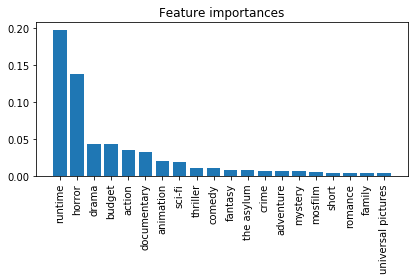

In [42]:
featureImportances = np.argsort(RandomForestReg.feature_importances_)[::-1]
print(train_X.columns[featureImportances[:20]])
plt.figure()
plt.title("Feature importances")
plt.bar(range(20),RandomForestReg.feature_importances_[featureImportances[:20]])
plt.xticks(range(20), train_X.columns[featureImportances[:20]], rotation='vertical')
plt.tight_layout()
plt.savefig('../data/randomforest.png')
plt.show()

# XGBoost (eXreme Gradient Boosting)

In [7]:
xgbRegression = xgb.XGBRegressor(objective='reg:squarederror').fit(train_X, train_data['IMDB Score'])

In [8]:
print('train R^2: ', xgbRegression.score(train_X, train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(xgbRegression.predict(train_X), train_data['IMDB Score']))

print('valid R^2: ', xgbRegression.score(valid_X, valid_data['IMDB Score']))
print('valid MSE: ', mean_squared_error(xgbRegression.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', xgbRegression.score(test_X, test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(xgbRegression.predict(test_X), test_data['IMDB Score']))

train R^2:  0.4859770114154863
train MSE:  0.6338340623192735
valid R^2:  0.3953081272777693
valid MSE:  0.7633376006691178
test R^2:  0.3699303945074095
test MSE:  0.7950647793381508
